In [3]:
!pip install keras

In [5]:
!pip install tensorflow

  Stored in directory: C:\Users\gplus\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\gplus\AppData\Local\pip\Cache\wheels\2c\b1\94\43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
  Stored in directory: C:\Users\gplus\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\gplus\AppData\Local\pip\Cache\wheels\a7\15\a0\0a0561549ad11cdc1bc8fa1191a353efd30facf6bfb507aefc
Successfully built gast opt-einsum termcolor absl-py


tensorboard 2.0.2 has requirement setuptools>=41.0.0, but you'll have setuptools 40.8.0 which is incompatible.


In [93]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [114]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=r"C:\Users\gplus\Desktop\New folder\Train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=r"C:\Users\gplus\Desktop\New folder\Test", target_size=(224,224))

Found 27652 images belonging to 2 classes.
Found 6653 images belonging to 2 classes.


In [115]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

In [116]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [117]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

In [118]:
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model_final = Model(input = vggmodel.input, output = predictions)

In [119]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [120]:
model_final.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [121]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 2, epochs= 50, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])
model_final.save_weights("vgg16_1.h5")

Epoch 1/50
2/2 [==============================] - 23s 12s/step - loss: 1.0265 - accuracy: 0.4844 - val_loss: 0.9207 - val_accuracy: 0.4375
Epoch 2/50
2/2 [==============================] - 19s 10s/step - loss: 0.5702 - accuracy: 0.7031 - val_loss: 0.4039 - val_accuracy: 0.7812
Epoch 3/50
2/2 [==============================] - 17s 9s/step - loss: 0.3976 - accuracy: 0.7812 - val_loss: 0.2343 - val_accuracy: 0.9062
Epoch 4/50
2/2 [==============================] - 20s 10s/step - loss: 0.1674 - accuracy: 0.9688 - val_loss: 0.1069 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 16s 8s/step - loss: 0.0961 - accuracy: 0.9688 - val_loss: 0.0979 - val_accuracy: 0.9688
Epoch 6/50
2/2 [==============================] - 16s 8s/step - loss: 0.0460 - accuracy: 1.0000 - val_loss: 0.0795 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 21s 10s/step - loss: 0.0438 - accuracy: 0.9844 - val_loss: 0.1908 - val_accuracy: 0.9375
Epoch 8/50
2/2 [==============

In [21]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

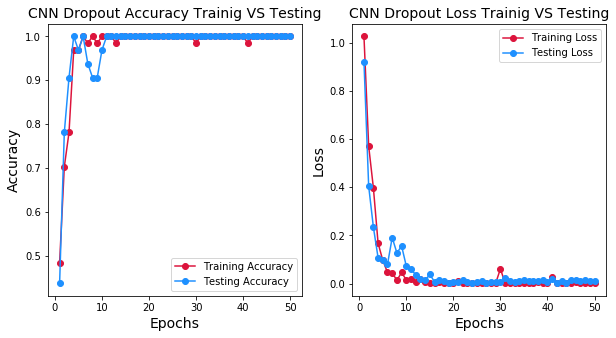

In [122]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].plot(range(1, len(model_final.history.history['accuracy']) + 1), model_final.history.history['accuracy'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Accuracy')
axes[0].plot(range(1, len(model_final.history.history['val_accuracy']) + 1), model_final.history.history['val_accuracy'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Accuracy')
axes[0].set_xlabel('Epochs', fontsize = 14)
axes[0].set_ylabel('Accuracy',fontsize = 14)
axes[0].set_title('CNN Dropout Accuracy Trainig VS Testing', fontsize = 14)
axes[0].legend(loc = 'best')
axes[1].plot(range(1, len(model_final.history.history['loss']) + 1), model_final.history.history['loss'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Loss')
axes[1].plot(range(1, len(model_final.history.history['val_loss']) + 1), model_final.history.history['val_loss'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Loss')
axes[1].set_xlabel('Epochs', fontsize = 14)
axes[1].set_ylabel('Loss',fontsize = 14)
axes[1].set_title('CNN Dropout Loss Trainig VS Testing', fontsize = 14)
axes[1].legend(loc = 'best')

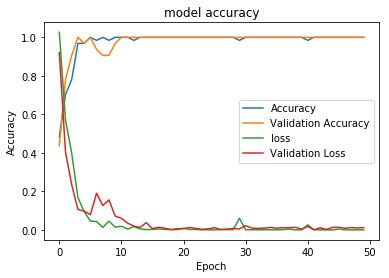

In [123]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

Getting output for images

In [59]:
import pandas as pd
df=pd.read_csv("sample.csv")

In [60]:
df.head()

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [62]:
import os
print(os.listdir(r"C:\Users\gplus\Desktop\New Folder"))

['Test', 'Train']


In [126]:
for e,i in enumerate(os.listdir(r"C:\Users\gplus\Desktop\Final Validation\Never Used")):
    print(i)
    output=[]
    img = image.load_img(os.path.join(r"C:\Users\gplus\Desktop\Final Validation\Never Used",i),target_size=(224,224))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    output = model_final.predict(img)
    if output[0][0] > output[0][1]:
#         print("cat")
        df["id"][e]=i
        df["label"][e]="alert"
    else:
#         print('dog')
        df["id"][e]=i
        df["label"][e]="drowsy"

0 0001.jpg
0 0002.jpg
0 0003.jpg
0 0004.jpg
0 0005.jpg
0 0006.jpg
0 0007.jpg
0 0008.jpg
0 0009.jpg
0 0010.jpg
0 0011.jpg
0 0012.jpg
0 0013.jpg
0 0014.jpg
0 0015.jpg
0 0016.jpg
0 0017.jpg
0 0018.jpg
0 0019.jpg
0 0020.jpg
0 0021.jpg
0 0022.jpg
0 0023.jpg
0 0024.jpg
0 0025.jpg
0 0026.jpg
0 0027.jpg
0 0028.jpg
0 0029.jpg
0 0030.jpg
0 0031.jpg
0 0032.jpg
0 0033.jpg
0 0034.jpg
0 0035.jpg
0 0036.jpg
0 0037.jpg
0 0038.jpg
0 0039.jpg
0 0040.jpg
0 0041.jpg
0 0042.jpg
0 0043.jpg
0 0044.jpg
0 0045.jpg
0 0046.jpg
0 0047.jpg
0 0048.jpg
0 0049.jpg
0 0050.jpg
0 0051.jpg
0 0052.jpg
0 0053.jpg
0 0054.jpg
0 0055.jpg
0 0056.jpg
0 0057.jpg
0 0058.jpg
0 0059.jpg
0 0060.jpg
0 0061.jpg
0 0062.jpg
0 0063.jpg
0 0064.jpg
0 0065.jpg
0 0066.jpg
0 0067.jpg
0 0068.jpg
0 0069.jpg
0 0070.jpg
0 0071.jpg
0 0072.jpg
0 0073.jpg
0 0074.jpg
0 0075.jpg
0 0076.jpg
0 0077.jpg
0 0078.jpg
0 0079.jpg
0 0080.jpg
0 0081.jpg
0 0082.jpg
0 0083.jpg
0 0084.jpg
0 0085.jpg
0 0086.jpg
0 0087.jpg
0 0088.jpg
0 0089.jpg
0 0090.jpg
0 0091.jpg

0 0746.jpg
0 0747.jpg
0 0748.jpg
0 0749.jpg
0 0750.jpg
0 0751.jpg
0 0752.jpg
0 0753.jpg
0 0754.jpg
0 0755.jpg
0 0756.jpg
0 0757.jpg
0 0758.jpg
0 0759.jpg
0 0760.jpg
0 0761.jpg
0 0762.jpg
0 0763.jpg
0 0764.jpg
0 0765.jpg
0 0766.jpg
0 0767.jpg
0 0768.jpg
0 0769.jpg
0 0770.jpg
0 0771.jpg
0 0772.jpg
0 0773.jpg
0 0774.jpg
0 0775.jpg
0 0776.jpg
0 0777.jpg
0 0778.jpg
0 0779.jpg
0 0780.jpg
0 0781.jpg
0 0782.jpg
0 0783.jpg
0 0784.jpg
0 0785.jpg
0 0786.jpg
0 0787.jpg
0 0788.jpg
0 0789.jpg
0 0790.jpg
0 0791.jpg
0 0792.jpg
0 0793.jpg
0 0794.jpg
0 0795.jpg
0 0796.jpg
0 0797.jpg
0 0798.jpg
0 0799.jpg
0 0800.jpg
0 0801.jpg
0 0802.jpg
0 0803.jpg
0 0804.jpg
0 0805.jpg
0 0806.jpg
0 0807.jpg
0 0808.jpg
0 0809.jpg
0 0810.jpg
0 0811.jpg
0 0812.jpg
0 0813.jpg
0 0814.jpg
0 0815.jpg
0 0816.jpg
0 0817.jpg
0 0818.jpg
0 0819.jpg
0 0820.jpg
0 0821.jpg
0 0822.jpg
0 0823.jpg
0 0824.jpg
0 0825.jpg
0 0826.jpg
0 0827.jpg
0 0828.jpg
0 0829.jpg
0 0830.jpg
0 0831.jpg
0 0832.jpg
0 0833.jpg
0 0834.jpg
0 0835.jpg
0 0836.jpg

0 1491.jpg
0 1492.jpg
0 1493.jpg
0 1494.jpg
0 1495.jpg
0 1496.jpg
0 1497.jpg
0 1498.jpg
0 1499.jpg
0 1500.jpg
0 1501.jpg
0 1502.jpg
0 1503.jpg
0 1504.jpg
0 1505.jpg
0 1506.jpg
0 1507.jpg
0 1508.jpg
0 1509.jpg
0 1510.jpg
0 1511.jpg
0 1512.jpg
0 1513.jpg
0 1514.jpg
0 1515.jpg
0 1516.jpg
0 1517.jpg
0 1518.jpg
0 1519.jpg
0 1520.jpg
0 1521.jpg
0 1522.jpg
0 1523.jpg
0 1524.jpg
0 1525.jpg
0 1526.jpg
0 1527.jpg
0 1528.jpg
0 1529.jpg
0 1530.jpg
0 1531.jpg
0 1532.jpg
0 1533.jpg
0 1534.jpg
0 1535.jpg
0 1536.jpg
0 1537.jpg
0 1538.jpg
0 1539.jpg
0 1540.jpg
0 1541.jpg
0 1542.jpg
0 1543.jpg
0 1544.jpg
0 1545.jpg
0 1546.jpg
0 1547.jpg
0 1548.jpg
0 1549.jpg
0 1550.jpg
0 1551.jpg
0 1552.jpg
0 1553.jpg
0 1554.jpg
0 1555.jpg
0 1556.jpg
0 1557.jpg
0 1558.jpg
0 1559.jpg
0 1560.jpg
0 1561.jpg
0 1562.jpg
0 1563.jpg
0 1564.jpg
0 1565.jpg
0 1566.jpg
0 1567.jpg
0 1568.jpg
0 1569.jpg
0 1570.jpg
0 1571.jpg
0 1572.jpg
0 1573.jpg
0 1574.jpg
0 1575.jpg
0 1576.jpg
0 1577.jpg
0 1578.jpg
0 1579.jpg
0 1580.jpg
0 1581.jpg

10 0430.jpg
10 0431.jpg
10 0432.jpg
10 0433.jpg
10 0434.jpg
10 0435.jpg
10 0436.jpg
10 0437.jpg
10 0438.jpg
10 0439.jpg
10 0440.jpg
10 0441.jpg
10 0442.jpg
10 0443.jpg
10 0444.jpg
10 0445.jpg
10 0446.jpg
10 0447.jpg
10 0448.jpg
10 0449.jpg
10 0450.jpg
10 0451.jpg
10 0452.jpg
10 0453.jpg
10 0454.jpg
10 0455.jpg
10 0456.jpg
10 0457.jpg
10 0458.jpg
10 0459.jpg
10 0460.jpg
10 0461.jpg
10 0462.jpg
10 0463.jpg
10 0464.jpg
10 0465.jpg
10 0466.jpg
10 0467.jpg
10 0468.jpg
10 0469.jpg
10 0470.jpg
10 0471.jpg
10 0472.jpg
10 0473.jpg
10 0474.jpg
10 0475.jpg
10 0476.jpg
10 0477.jpg
10 0478.jpg
10 0479.jpg
10 0480.jpg
10 0481.jpg
10 0482.jpg
10 0483.jpg
10 0484.jpg
10 0485.jpg
10 0486.jpg
10 0487.jpg
10 0488.jpg
10 0489.jpg
10 0490.jpg
10 0491.jpg
10 0492.jpg
10 0493.jpg
10 0494.jpg
10 0495.jpg
10 0496.jpg
10 0497.jpg
10 0498.jpg
10 0499.jpg
10 0500.jpg
10 0501.jpg
10 0502.jpg
10 0503.jpg
10 0504.jpg
10 0505.jpg
10 0506.jpg
10 0507.jpg
10 0508.jpg
10 0509.jpg
10 0510.jpg
10 0511.jpg
10 0512.jpg
10 0

10 1113.jpg
10 1114.jpg
10 1115.jpg
10 1116.jpg
10 1117.jpg
10 1118.jpg
10 1119.jpg
10 1120.jpg
10 1121.jpg
10 1122.jpg
10 1123.jpg
10 1124.jpg
10 1125.jpg
10 1126.jpg
10 1127.jpg
10 1128.jpg
10 1129.jpg
10 1130.jpg
10 1131.jpg
10 1132.jpg
10 1133.jpg
10 1134.jpg
10 1135.jpg
10 1136.jpg
10 1137.jpg
10 1138.jpg
10 1139.jpg
10 1140.jpg
10 1141.jpg
10 1142.jpg
10 1143.jpg
10 1144.jpg
10 1145.jpg
10 1146.jpg
10 1147.jpg
10 1148.jpg
10 1149.jpg
10 1150.jpg
10 1151.jpg
10 1152.jpg
10 1153.jpg
10 1154.jpg
10 1155.jpg
10 1156.jpg
10 1157.jpg
10 1158.jpg
10 1159.jpg
10 1160.jpg
10 1161.jpg
10 1162.jpg
10 1163.jpg
10 1164.jpg
10 1165.jpg
10 1166.jpg
10 1167.jpg
10 1168.jpg
10 1169.jpg
10 1170.jpg
10 1171.jpg
10 1172.jpg
10 1173.jpg
10 1174.jpg
10 1175.jpg
10 1176.jpg
10 1177.jpg
10 1178.jpg
10 1179.jpg
10 1180.jpg
10 1181.jpg
10 1182.jpg
10 1183.jpg
10 1184.jpg
10 1185.jpg
10 1186.jpg
10 1187.jpg
10 1188.jpg
10 1189.jpg
10 1190.jpg
10 1191.jpg
10 1192.jpg
10 1193.jpg
10 1194.jpg
10 1195.jpg
10 1

In [70]:
df.head()

,id,label
0,0 0001 (2).jpg,alert
1,0 0001.jpg,alert
2,0 0002 (2).jpg,alert
3,0 0002.jpg,alert
4,0 0003 (2).jpg,alert


In [127]:
df.to_csv("results.csv",index=False)